# Embedding Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

[6.5782181  2.97003654 6.99943871]


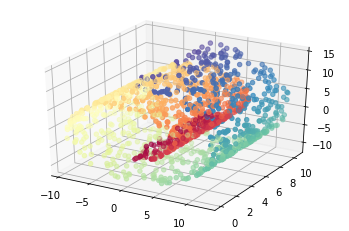

In [2]:
swiss, color = datasets.make_swiss_roll(1600)
swiss[:,1] = swiss[:,1]/2
print(np.std(swiss, axis=0))#, np.std(swiss, axis=1), np.std(swiss, axis=2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss[:, 0], swiss[:,1], swiss[:,2], c=color, cmap=plt.cm.Spectral)

# PCA

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
compressed = pca.fit_transform(swiss)

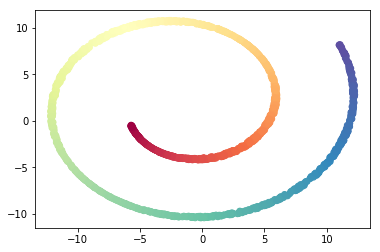

In [4]:
plt.scatter(compressed[:,0], compressed[:,1], c=color, cmap = plt.cm.Spectral)

# Self - Organising Maps

In [5]:
from minisom import MiniSom
som = MiniSom(20,25, 3, sigma=0.5, learning_rate=0.5) # initialization of 100 x 100 SOM
som.random_weights_init(swiss)
som.train_random(swiss, 10000)

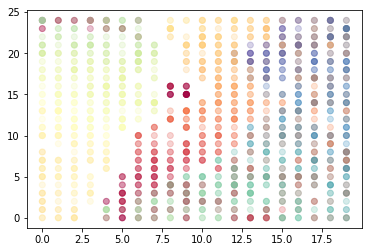

In [6]:
for i, x in enumerate(swiss):
    w = som.winner(x)  # getting the winner
    if i==0:
        res = w
    else:
        res = np.vstack([res, w])
plt.scatter(res[:,0], res[:,1], c=color, cmap=plt.cm.Spectral, alpha=0.25)

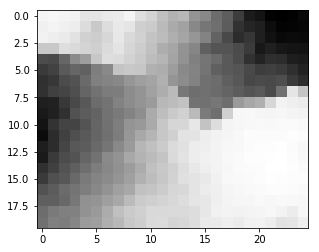

In [7]:
plt.imshow(som._activation_map, cmap="Greys")

# SOM for MNIST digits

Building visualization...


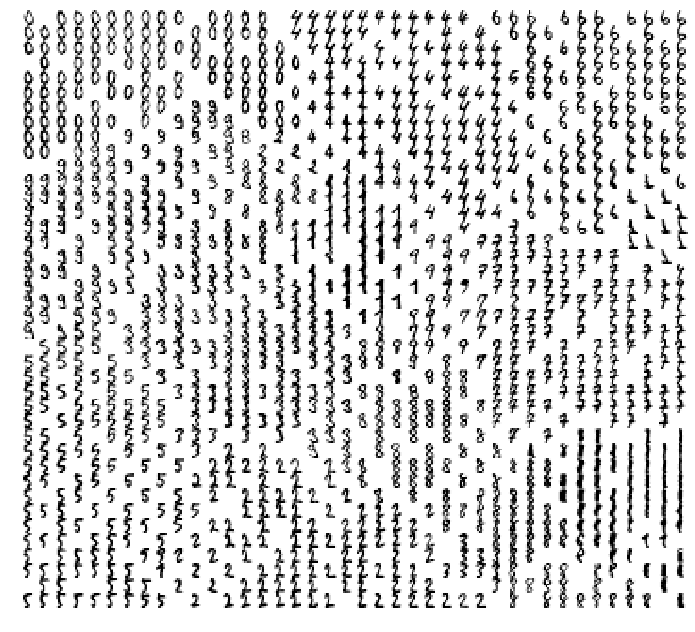

In [8]:
import matplotlib.gridspec as gridspec
from sklearn import datasets
from neupy import algorithms, environment

GRID_HEIGHT = 40
GRID_WIDTH = 40

digits = datasets.load_digits()
data = digits.data

sofm = algorithms.SOFM(
    n_inputs=64,
    features_grid=(GRID_HEIGHT, GRID_WIDTH),
    # Learning radius defines area within which we find
    # winning neuron neighbours. The higher the value
    # the more values we will be updated after each iteration.
    learning_radius=5,
    # Every 20 epochs learning radius will be reduced by 1.
    reduce_radius_after=20,

    step=0.5,
    std=1,

    shuffle_data=True,
    verbose=False,
)
sofm.train(data, epochs=100)
clusters = sofm.predict(data).argmax(axis=1)

print("Building visualization...")
plt.figure(figsize=(12, 11))

grid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)
grid.update(wspace=0, hspace=0)

for row_id in range(GRID_HEIGHT):
    #print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))
    for col_id in range(GRID_WIDTH):
        index = row_id * GRID_HEIGHT + col_id
        clustered_samples = data[clusters == index]
        if len(clustered_samples) > 0:
            sample = clustered_samples[0]
        else:# If we don't have samples in cluster then it means that there is a gap in space
            sample = np.zeros(64)
        plt.subplot(grid[index]); plt.imshow(sample.reshape((8, 8)), cmap='Greys');plt.axis('off')

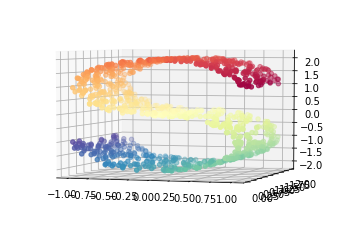

In [9]:
from sklearn.manifold import MDS
n_components = 2
n_points = 1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s_curve, s_color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=s_color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

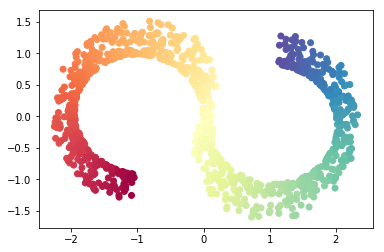

In [10]:
embedding = MDS(n_components, max_iter=1000, n_init=1)
s_MDS = embedding.fit_transform(s_curve)
plt.figure()
plt.scatter(s_MDS[:, 0], s_MDS[:, 1], c=s_color, cmap=plt.cm.Spectral)
plt.show()

In [11]:
import matplotlib.gridspec as gridspec
from sklearn import datasets
from neupy import algorithms, environment

GRID_HEIGHT = 40; GRID_WIDTH = 40
digits = datasets.load_digits()
data = digits.data
sofm = (
    n_inputs=64,
    features_grid=(GRID_HEIGHT, GRID_WIDTH), # Learning radius defines area within which we find
    learning_radius=5, # winning neuron neighbours. The higher the value the more values we will be updated after each iteration.
    # Every 20 epochs learning radius will be reduced by 1.
    reduce_radius_after=20,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=False,)
sofm.train(data, epochs=100)
clusters = sofm.predict(data).argmax(axis=1)

print("Building visualization...")
plt.figure(figsize=(12, 11))

grid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)
grid.update(wspace=0, hspace=0)

for row_id in range(GRID_HEIGHT):
    print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))

    for col_id in range(GRID_WIDTH):
        index = row_id * GRID_HEIGHT + col_id
        clustered_samples = data[clusters == index]

        if len(clustered_samples) > 0:
            # We take the first sample, but it can be any
            # sample from this cluster
            sample = clustered_samples[0]

        else:
            # If we don't have samples in cluster then
            # it means that there is a gap in space
            sample = np.zeros(64)

        plt.subplot(grid[index])
        plt.imshow(sample.reshape((8, 8)), cmap='Greys')
        plt.axis('off')

SyntaxError: invalid syntax (<ipython-input-11-0abb0fd71997>, line 9)

t-SNE